In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded CSV files
actor_df = pd.read_csv('Long Actor Grad_Norm.csv')
critic_df = pd.read_csv('Long Actor KL_Loss.csv')

# Display the first few rows of each dataframe to understand their structure
actor_df.head(), critic_df.head()


(   Step  long_run - actor/grad_norm  long_run - actor/grad_norm__MIN  \
 0     1                   26.186180                        26.186180   
 1     2                   26.116842                        26.116842   
 2     3                   19.464087                        19.464087   
 3     4                   10.576324                        10.576324   
 4     5                   13.397621                        13.397621   
 
    long_run - actor/grad_norm__MAX  
 0                        26.186180  
 1                        26.116842  
 2                        19.464087  
 3                        10.576324  
 4                        13.397621  ,
    Step  long_run - actor/kl_loss  long_run - actor/kl_loss__MIN  \
 0     1                  0.001239                       0.001239   
 1     2                  0.001263                       0.001263   
 2     3                  0.001178                       0.001178   
 3     4                  0.002072                     

In [12]:
import pandas as pd
from scipy.stats import pearsonr

# Load the actor and critic data
actor_df = pd.read_csv("Long Critic Advantage Mean.csv")
critic_df = pd.read_csv("Long Actor Entropy Loss.csv")

# Extract the relevant columns and align them by index
actor_series = actor_df.iloc[:, 1]
critic_series = critic_df.iloc[:, 1]

# Drop any NaN values for accurate correlation computation
valid_indices = actor_series.notna() & critic_series.notna()
actor_series = actor_series[valid_indices]
critic_series = critic_series[valid_indices]

# Compute Pearson correlation coefficient
pearson_corr, p_value = pearsonr(actor_series, critic_series)

pearson_corr, p_value


(0.5537887986991494, 3.188329448271295e-08)

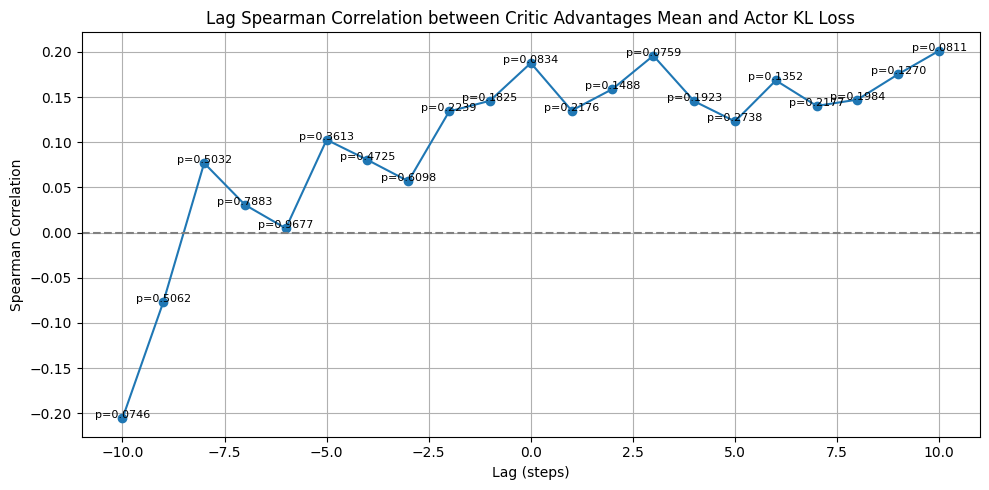

In [7]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Load the uploaded files
actor_df = pd.read_csv("Long Critic Advantage Mean.csv")
critic_df = pd.read_csv("Long Actor Entropy Loss.csv")

# Extract the metric series (2nd column)
actor_series = actor_df.iloc[:, 1]
critic_series = critic_df.iloc[:, 1]

# Filter valid entries
valid = actor_series.notna() & critic_series.notna()
actor_series = actor_series[valid].reset_index(drop=True)
critic_series = critic_series[valid].reset_index(drop=True)

# Compute lagged Spearman correlations
max_lag = 10
lag_results = []

for lag in range(-max_lag, max_lag + 1):
    if lag < 0:
        shifted_critic = critic_series[:lag]
        shifted_actor = actor_series[-lag:]
    elif lag > 0:
        shifted_critic = critic_series[lag:]
        shifted_actor = actor_series[:-lag]
    else:
        shifted_critic = critic_series
        shifted_actor = actor_series

    corr, p_val = spearmanr(shifted_actor, shifted_critic)
    lag_results.append({'Lag': lag, 'Correlation': corr, 'P-Value': p_val})

# Convert to DataFrame
lag_df = pd.DataFrame(lag_results)

# Plot Spearman lag correlation
plt.figure(figsize=(10, 5))
plt.plot(lag_df["Lag"], lag_df["Correlation"], marker='o', label='Spearman Correlation')
plt.axhline(0, color='gray', linestyle='--')
for i, row in lag_df.iterrows():
    plt.text(row["Lag"], row["Correlation"], f'p={row["P-Value"]:.4f}', ha='center', fontsize=8)
plt.title("Lag Spearman Correlation between Critic Advantages Mean and Actor KL Loss")
plt.xlabel("Lag (steps)")
plt.ylabel("Spearman Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
